A MODEL FOR DETECTION OF ANOMALY USING KNN-ALGORITHM

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
dataset=pd.read_csv('waterproject.csv')
len(dataset)
dataset

,USER_TYPE,CATEGORY,JAN_09,FEB_09,MARCH_09,APRIL_09,MAY_09,JUNE_09,JULY_09,AUGUST_09,...,MARCH_15,APRIL_15,MAY_15,JUNE_15,JULY_15,AUGUST_15,SEPT_15,OCT_15,NOV_15,DEC_15
0,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0
2,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,17.0,...,19.0,19.0,18.0,18.0,19.0,19.0,19.0,18.0,18.0,24.0
3,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,24.0
4,H3,DOMESTIC,30.0,10.0,30.0,20.0,30.0,30.0,30.0,30.0,...,14.0,15.0,26.0,27.0,29.0,22.0,27.0,26.0,33.0,32.0
5,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,0.0,7.0,7.0,8.0,5.0,7.0,16.0,7.0,7.0,4.0
6,H3,DOMESTIC,19.0,21.0,21.0,22.0,26.0,20.0,23.0,21.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0
7,H3,DOMESTIC,9.0,12.0,13.0,13.0,22.0,21.0,19.0,20.0,...,14.0,25.0,17.0,36.0,34.0,39.0,52.0,33.0,27.0,27.0
8,H3,DOMESTIC,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,...,7.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,4.0,5.0
9,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [5]:
#dataset.isna()

In [6]:
#print(len(dataset))
#dataset['JAN_09'].isna()

In [7]:
dataset['JAN_09'].mean()

64.52147861802368

In [8]:
#Description of the data
dataset.describe()

,JAN_09,FEB_09,MARCH_09,APRIL_09,MAY_09,JUNE_09,JULY_09,AUGUST_09,SEPT_09,OCT_09,...,MARCH_15,APRIL_15,MAY_15,JUNE_15,JULY_15,AUGUST_15,SEPT_15,OCT_15,NOV_15,DEC_15
count,144865.000000,146765.000000,147106.000000,147540.000000,148469.000000,149361.000000,149853.000000,150181.000000,150663.000000,151121.000000,...,174054.000000,174396.000000,174990.000000,175205.000000,175326.000000,175401.000000,175471.000000,175606.000000,175699.000000,175758.000000
mean,64.521479,47.727319,37.742526,41.575031,46.101900,59.931267,64.589351,77.995392,83.258059,95.818675,...,87.754025,81.406976,90.897840,85.917274,111.072625,101.028637,110.832992,61.955394,86.056381,79.480667
std,350.473335,231.075916,175.574905,197.785991,236.266485,336.356413,366.113792,461.278483,507.000719,601.458249,...,604.280999,533.436472,622.095883,572.116146,770.997775,691.554071,772.634584,372.098645,572.525240,534.562270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,11.000000,10.000000,11.000000,13.000000,12.000000,12.000000,12.000000,11.000000,11.000000,...,8.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,8.000000
50%,19.000000,18.000000,18.000000,19.000000,20.000000,19.000000,19.000000,20.000000,19.000000,19.000000,...,15.000000,18.000000,15.000000,16.000000,17.000000,16.000000,16.000000,16.000000,16.000000,14.000000
75%,23.000000,23.000000,22.000000,23.000000,24.000000,23.000000,24.000000,25.000000,23.000000,23.000000,...,21.000000,23.000000,22.000000,22.000000,23.000000,23.000000,23.000000,22.000000,23.000000,21.000000
max,24692.000000,24130.000000,24130.000000,26236.000000,42420.000000,44505.000000,48029.000000,49922.000000,48978.000000,49915.000000,...,55162.000000,50955.000000,49325.000000,31328.000000,24809.000000,19885.000000,9785.000000,5185.000000,34863.000000,34597.000000


In [9]:
#dataset.max()

In [10]:
#Showing the values of category column
dataset['CATEGORY'].unique()

array(['DOMESTIC', 'SOCIAL', 'COMERCIAL', 'INDUSTRIAL', 'INSTITUTIONAL'],
      dtype=object)

In [11]:
dataset.dtypes

USER_TYPE     object
CATEGORY      object
JAN_09       float64
FEB_09       float64
MARCH_09     float64
APRIL_09     float64
MAY_09       float64
JUNE_09      float64
JULY_09      float64
AUGUST_09    float64
SEPT_09      float64
OCT_09       float64
NOV_09       float64
DEC_09       float64
JAN_10       float64
FEB_10       float64
MARCH_10     float64
APRIL_10     float64
MAY_10       float64
JUNE_10      float64
JULY_10      float64
AUGUST_10    float64
SEPT_10      float64
OCT_10       float64
NOV_10       float64
DEC_10       float64
JAN_11       float64
FEB_11       float64
MARCH_11     float64
APRIL_11     float64
              ...   
JULY_13      float64
AUGUST_13    float64
SEPT_13      float64
OCT_13       float64
NOV_13       float64
DEC_13       float64
JAN_14       float64
FEB_14       float64
MARCH_14     float64
APRIL_14     float64
MAY_14       float64
JUNE_14      float64
JULY_14      float64
AUGUST_14    float64
SEPT_14      float64
OCT_14       float64
NOV_14       

In [12]:
#showing missing values of the data
#import numpy as np
#dataset==np.nan

In [13]:
#Dropping rows which have more than 50 columns missing 
#out of the 84 columns
dataset.dropna(thresh=50)

,USER_TYPE,CATEGORY,JAN_09,FEB_09,MARCH_09,APRIL_09,MAY_09,JUNE_09,JULY_09,AUGUST_09,...,MARCH_15,APRIL_15,MAY_15,JUNE_15,JULY_15,AUGUST_15,SEPT_15,OCT_15,NOV_15,DEC_15
0,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0
2,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,17.0,...,19.0,19.0,18.0,18.0,19.0,19.0,19.0,18.0,18.0,24.0
3,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,24.0
4,H3,DOMESTIC,30.0,10.0,30.0,20.0,30.0,30.0,30.0,30.0,...,14.0,15.0,26.0,27.0,29.0,22.0,27.0,26.0,33.0,32.0
5,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,0.0,7.0,7.0,8.0,5.0,7.0,16.0,7.0,7.0,4.0
6,H3,DOMESTIC,19.0,21.0,21.0,22.0,26.0,20.0,23.0,21.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0
7,H3,DOMESTIC,9.0,12.0,13.0,13.0,22.0,21.0,19.0,20.0,...,14.0,25.0,17.0,36.0,34.0,39.0,52.0,33.0,27.0,27.0
8,H3,DOMESTIC,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,...,7.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,4.0,5.0
9,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [14]:
dataset.describe()

,JAN_09,FEB_09,MARCH_09,APRIL_09,MAY_09,JUNE_09,JULY_09,AUGUST_09,SEPT_09,OCT_09,...,MARCH_15,APRIL_15,MAY_15,JUNE_15,JULY_15,AUGUST_15,SEPT_15,OCT_15,NOV_15,DEC_15
count,144865.000000,146765.000000,147106.000000,147540.000000,148469.000000,149361.000000,149853.000000,150181.000000,150663.000000,151121.000000,...,174054.000000,174396.000000,174990.000000,175205.000000,175326.000000,175401.000000,175471.000000,175606.000000,175699.000000,175758.000000
mean,64.521479,47.727319,37.742526,41.575031,46.101900,59.931267,64.589351,77.995392,83.258059,95.818675,...,87.754025,81.406976,90.897840,85.917274,111.072625,101.028637,110.832992,61.955394,86.056381,79.480667
std,350.473335,231.075916,175.574905,197.785991,236.266485,336.356413,366.113792,461.278483,507.000719,601.458249,...,604.280999,533.436472,622.095883,572.116146,770.997775,691.554071,772.634584,372.098645,572.525240,534.562270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,11.000000,10.000000,11.000000,13.000000,12.000000,12.000000,12.000000,11.000000,11.000000,...,8.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,8.000000
50%,19.000000,18.000000,18.000000,19.000000,20.000000,19.000000,19.000000,20.000000,19.000000,19.000000,...,15.000000,18.000000,15.000000,16.000000,17.000000,16.000000,16.000000,16.000000,16.000000,14.000000
75%,23.000000,23.000000,22.000000,23.000000,24.000000,23.000000,24.000000,25.000000,23.000000,23.000000,...,21.000000,23.000000,22.000000,22.000000,23.000000,23.000000,23.000000,22.000000,23.000000,21.000000
max,24692.000000,24130.000000,24130.000000,26236.000000,42420.000000,44505.000000,48029.000000,49922.000000,48978.000000,49915.000000,...,55162.000000,50955.000000,49325.000000,31328.000000,24809.000000,19885.000000,9785.000000,5185.000000,34863.000000,34597.000000


In [15]:
#Fillining missing values of JAN_09 column with the mean value
dataset['JAN_09'].fillna(dataset['JAN_09'].mean(), inplace=True)
dataset['JAN_09'].head()

0    20.0
1    20.0
2    20.0
3    20.0
4    30.0
Name: JAN_09, dtype: float64

In [16]:
#Fillining missing values of FEB_09 column with the mean value
dataset['FEB_09'].fillna(dataset['FEB_09'].mean(), inplace=True)
dataset['FEB_09'].head()

0    20.0
1    20.0
2    20.0
3    20.0
4    10.0
Name: FEB_09, dtype: float64

In [17]:
#Fillining missing values of MARCH_09 column with the mean value
dataset['MARCH_09'].fillna(dataset['MARCH_09'].mean(), inplace=True)
dataset['MARCH_09'].head()

0    20.0
1    20.0
2    20.0
3    20.0
4    30.0
Name: MARCH_09, dtype: float64

In [18]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['APRIL_09'].fillna(dataset['APRIL_09'].mean(), inplace=True)
dataset['APRIL_09'].tail()

178421    1316.0
178422    1316.0
178423    1316.0
178424    1316.0
178425    1316.0
Name: APRIL_09, dtype: float64

In [19]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MAY_09'].fillna(dataset['MAY_09'].mean(), inplace=True)
dataset['MAY_09'].head()

0    20.0
1    20.0
2    20.0
3    20.0
4    30.0
Name: MAY_09, dtype: float64

In [20]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JUNE_09'].fillna(dataset['JUNE_09'].mean(), inplace=True)
dataset['JUNE_09'].head(10)

0    20.0
1    20.0
2    20.0
3    20.0
4    30.0
5    20.0
6    20.0
7    21.0
8    14.0
9    20.0
Name: JUNE_09, dtype: float64

In [21]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JULY_09'].fillna(dataset['JULY_09'].mean(), inplace=True)
dataset['JULY_09'].head()

0    20.0
1    20.0
2    20.0
3    20.0
4    30.0
Name: JULY_09, dtype: float64

In [22]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['AUGUST_09'].fillna(dataset['AUGUST_09'].mean(), inplace=True)
dataset['AUGUST_09'].head()

0    20.0
1    20.0
2    17.0
3    20.0
4    30.0
Name: AUGUST_09, dtype: float64

In [23]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['SEPT_09'].fillna(dataset['SEPT_09'].mean(), inplace=True)
dataset['SEPT_09'].head()

0    20.0
1    20.0
2    14.0
3    20.0
4    30.0
Name: SEPT_09, dtype: float64

In [24]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['OCT_09'].fillna(dataset['OCT_09'].mean(), inplace=True)
dataset['OCT_09'].head()

0    20.0
1    20.0
2    10.0
3    20.0
4    30.0
Name: OCT_09, dtype: float64

In [25]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['NOV_09'].fillna(dataset['NOV_09'].mean(), inplace=True)
dataset['NOV_09'].head()

0    20.0
1    20.0
2    11.0
3    20.0
4    30.0
Name: NOV_09, dtype: float64

In [26]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['DEC_09'].fillna(dataset['DEC_09'].mean(), inplace=True)
dataset['DEC_09'].head()

0    20.0
1    20.0
2     9.0
3    20.0
4    30.0
Name: DEC_09, dtype: float64

In [27]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JAN_10'].fillna(dataset['JAN_10'].mean(), inplace=True)
dataset['JAN_10'].head()

0    20.0
1    20.0
2    15.0
3    20.0
4    30.0
Name: JAN_10, dtype: float64

In [28]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['FEB_10'].fillna(dataset['FEB_10'].mean(), inplace=True)
dataset['FEB_10'].head()

0    20.0
1    20.0
2    10.0
3    20.0
4    30.0
Name: FEB_10, dtype: float64

In [29]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MARCH_10'].fillna(dataset['MARCH_10'].mean(), inplace=True)
dataset['MARCH_10'].head()

0    20.0
1    20.0
2    11.0
3    20.0
4    30.0
Name: MARCH_10, dtype: float64

In [30]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['APRIL_10'].fillna(dataset['APRIL_10'].mean(), inplace=True)
dataset['APRIL_10'].head()

0    20.0
1    20.0
2    19.0
3    20.0
4    30.0
Name: APRIL_10, dtype: float64

In [31]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MAY_10'].fillna(dataset['MAY_10'].mean(), inplace=True)
dataset['MAY_10'].head()

0    20.0
1    20.0
2    22.0
3    20.0
4    30.0
Name: MAY_10, dtype: float64

In [32]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JUNE_10'].fillna(dataset['JUNE_10'].mean(), inplace=True)
dataset['JUNE_10'].head()

0    20.0
1    20.0
2    30.0
3    20.0
4    30.0
Name: JUNE_10, dtype: float64

In [33]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JULY_10'].fillna(dataset['JULY_10'].mean(), inplace=True)
dataset['JULY_10'].head()

0    20.0
1    20.0
2    17.0
3    20.0
4    30.0
Name: JULY_10, dtype: float64

In [34]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['AUGUST_10'].fillna(dataset['AUGUST_10'].mean(), inplace=True)
dataset['AUGUST_10'].head()

0    20.0
1    20.0
2    32.0
3    20.0
4    30.0
Name: AUGUST_10, dtype: float64

In [35]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['SEPT_10'].fillna(dataset['SEPT_10'].mean(), inplace=True)
dataset['SEPT_10'].head()

0    20.0
1    20.0
2    25.0
3    20.0
4    30.0
Name: SEPT_10, dtype: float64

In [36]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['OCT_10'].fillna(dataset['OCT_10'].mean(), inplace=True)
dataset['OCT_10'].head()

0    20.0
1    20.0
2    22.0
3    20.0
4    30.0
Name: OCT_10, dtype: float64

In [37]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['NOV_10'].fillna(dataset['NOV_10'].mean(), inplace=True)
dataset['NOV_10'].head()

0    20.0
1    20.0
2    21.0
3    20.0
4    30.0
Name: NOV_10, dtype: float64

In [38]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['DEC_10'].fillna(dataset['DEC_10'].mean(), inplace=True)
dataset['DEC_10'].head()

0    20.0
1    20.0
2    22.0
3    20.0
4    30.0
Name: DEC_10, dtype: float64

In [39]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JAN_11'].fillna(dataset['JAN_11'].mean(), inplace=True)
dataset['JAN_11'].head()

0    20.0
1    20.0
2    28.0
3    20.0
4    30.0
Name: JAN_11, dtype: float64

In [40]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['FEB_11'].fillna(dataset['FEB_11'].mean(), inplace=True)
dataset['FEB_11'].head()

0    20.0
1    20.0
2    40.0
3    20.0
4    30.0
Name: FEB_11, dtype: float64

In [41]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MARCH_11'].fillna(dataset['MARCH_11'].mean(), inplace=True)
dataset['MARCH_11'].head()

0    20.0
1    20.0
2    26.0
3    19.0
4    29.0
Name: MARCH_11, dtype: float64

In [42]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['APRIL_11'].fillna(dataset['APRIL_11'].mean(), inplace=True)
dataset['APRIL_11'].head()

0    20.0
1    20.0
2    11.0
3    44.0
4     7.0
Name: APRIL_11, dtype: float64

In [43]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MAY_11'].fillna(dataset['MAY_11'].mean(), inplace=True)
dataset['MAY_11'].head()


0    20.0
1    20.0
2    28.0
3    40.0
4    18.0
Name: MAY_11, dtype: float64

In [44]:
dataset.head()

,USER_TYPE,CATEGORY,JAN_09,FEB_09,MARCH_09,APRIL_09,MAY_09,JUNE_09,JULY_09,AUGUST_09,...,MARCH_15,APRIL_15,MAY_15,JUNE_15,JULY_15,AUGUST_15,SEPT_15,OCT_15,NOV_15,DEC_15
0,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0
2,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,17.0,...,19.0,19.0,18.0,18.0,19.0,19.0,19.0,18.0,18.0,24.0
3,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,24.0
4,H3,DOMESTIC,30.0,10.0,30.0,20.0,30.0,30.0,30.0,30.0,...,14.0,15.0,26.0,27.0,29.0,22.0,27.0,26.0,33.0,32.0


In [45]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JUNE_11'].fillna(dataset['JUNE_11'].mean(), inplace=True)
dataset['JUNE_11'].head()

0    10.0
1    20.0
2    30.0
3    35.0
4    20.0
Name: JUNE_11, dtype: float64

In [46]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JULY_11'].fillna(dataset['JULY_11'].mean(), inplace=True)
dataset['JULY_11'].head()

0    10.0
1    20.0
2    38.0
3    43.0
4    23.0
Name: JULY_11, dtype: float64

In [47]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['AUGUST_11'].fillna(dataset['AUGUST_11'].mean(), inplace=True)
dataset['AUGUST_11'].head()

0    10.0
1    20.0
2    24.0
3    35.0
4    15.0
Name: AUGUST_11, dtype: float64

In [48]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['SEPT_11'].fillna(dataset['SEPT_11'].mean(), inplace=True)
dataset['SEPT_11'].head()

0    10.0
1    20.0
2    38.0
3    44.0
4    19.0
Name: SEPT_11, dtype: float64

In [49]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['OCT_11'].fillna(dataset['OCT_11'].mean(), inplace=True)
dataset['OCT_11'].head()

0    10.0
1    20.0
2    21.0
3    36.0
4    15.0
Name: OCT_11, dtype: float64

In [50]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['NOV_11'].fillna(dataset['NOV_11'].mean(), inplace=True)
dataset['NOV_11'].head()

0    10.0
1    20.0
2    18.0
3    34.0
4    15.0
Name: NOV_11, dtype: float64

In [51]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['DEC_11'].fillna(dataset['DEC_11'].mean(), inplace=True)
dataset['DEC_11'].head()

0    10.0
1    20.0
2    20.0
3    34.0
4    15.0
Name: DEC_11, dtype: float64

In [52]:
#SUM OF MISSING VALUES IN EVERY COLUMNS
#dataset.apply(lambda x: sum(x.isnull()),axis=0)

In [53]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JAN_12'].fillna(dataset['JAN_12'].mean(), inplace=True)
dataset['JAN_12'].head()

0    10.0
1    20.0
2    18.0
3    31.0
4     7.0
Name: JAN_12, dtype: float64

In [54]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['FEB_12'].fillna(dataset['FEB_12'].mean(), inplace=True)
dataset['FEB_12'].head()

0    10.0
1    20.0
2    19.0
3    35.0
4     8.0
Name: FEB_12, dtype: float64

In [55]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MARCH_12'].fillna(dataset['MARCH_12'].mean(), inplace=True)
dataset['MARCH_12'].head()

0    10.0
1    20.0
2    15.0
3    29.0
4    11.0
Name: MARCH_12, dtype: float64

In [56]:
dataset.apply(lambda x: sum(x.isnull()),axis=0)

USER_TYPE        0
CATEGORY         0
JAN_09           0
FEB_09           0
MARCH_09         0
APRIL_09         0
MAY_09           0
JUNE_09          0
JULY_09          0
AUGUST_09        0
SEPT_09          0
OCT_09           0
NOV_09           0
DEC_09           0
JAN_10           0
FEB_10           0
MARCH_10         0
APRIL_10         0
MAY_10           0
JUNE_10          0
JULY_10          0
AUGUST_10        0
SEPT_10          0
OCT_10           0
NOV_10           0
DEC_10           0
JAN_11           0
FEB_11           0
MARCH_11         0
APRIL_11         0
             ...  
JULY_13      11180
AUGUST_13    11229
SEPT_13      10548
OCT_13       10220
NOV_13       10128
DEC_13        9921
JAN_14        9785
FEB_14        9612
MARCH_14      9016
APRIL_14      8546
MAY_14        7726
JUNE_14       6935
JULY_14       6919
AUGUST_14     6459
SEPT_14       6199
OCT_14        5938
NOV_14        6229
DEC_14        5764
JAN_15        5427
FEB_15        5113
MARCH_15      4372
APRIL_15    

In [57]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['APRIL_12'].fillna(dataset['APRIL_12'].mean(), inplace=True)
dataset['APRIL_12'].head()

0    10.0
1    20.0
2    18.0
3    32.0
4    10.0
Name: APRIL_12, dtype: float64

In [58]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MAY_12'].fillna(dataset['MAY_12'].mean(), inplace=True)
dataset['MAY_12'].head()

0    10.0
1    20.0
2    17.0
3    31.0
4    11.0
Name: MAY_12, dtype: float64

In [59]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JULY_12'].fillna(dataset['JULY_12'].mean(), inplace=True)
dataset['JULY_12'].head()

0    10.0
1    20.0
2    17.0
3    30.0
4    18.0
Name: JULY_12, dtype: float64

In [60]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['AUGUST_12'].fillna(dataset['AUGUST_12'].mean(), inplace=True)
dataset['AUGUST_12'].head()

0    10.0
1    20.0
2    16.0
3    30.0
4    18.0
Name: AUGUST_12, dtype: float64

In [61]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['SEPT_12'].fillna(dataset['SEPT_12'].mean(), inplace=True)
dataset['SEPT_12'].head()

0    10.0
1    20.0
2    16.0
3    30.0
4    13.0
Name: SEPT_12, dtype: float64

In [62]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['OCT_12'].fillna(dataset['OCT_12'].mean(), inplace=True)
dataset['OCT_12'].head()

0    10.0
1    20.0
2    16.0
3    30.0
4     9.0
Name: OCT_12, dtype: float64

In [63]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['NOV_12'].fillna(dataset['NOV_12'].mean(), inplace=True)
dataset['NOV_12'].head()

0    10.0
1    20.0
2    16.0
3    30.0
4     9.0
Name: NOV_12, dtype: float64

In [64]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['DEC_12'].fillna(dataset['DEC_12'].mean(), inplace=True)
dataset['DEC_12'].head()

0    10.0
1    20.0
2    15.0
3    29.0
4     4.0
Name: DEC_12, dtype: float64

In [65]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JAN_13'].fillna(dataset['JAN_13'].mean(), inplace=True)
dataset['JAN_13'].head()

0    10.0
1    20.0
2    16.0
3    30.0
4     1.0
Name: JAN_13, dtype: float64

In [66]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['FEB_13'].fillna(dataset['FEB_13'].mean(), inplace=True)
dataset['FEB_13'].head()

0    10.0
1    20.0
2    15.0
3    29.0
4     6.0
Name: FEB_13, dtype: float64

In [67]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MARCH_13'].fillna(dataset['MARCH_13'].mean(), inplace=True)
dataset['MARCH_13'].head()

0    10.0
1    20.0
2    15.0
3    29.0
4     1.0
Name: MARCH_13, dtype: float64

In [68]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['APRIL_13'].fillna(dataset['APRIL_13'].mean(), inplace=True)
dataset['APRIL_13'].head()

0    10.0
1    20.0
2    15.0
3     0.0
4     1.0
Name: APRIL_13, dtype: float64

In [69]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MAY_13'].fillna(dataset['MAY_13'].mean(), inplace=True)
dataset['MAY_13'].head()

0    10.0
1    20.0
2     0.0
3    24.0
4     9.0
Name: MAY_13, dtype: float64

In [70]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JUNE_13'].fillna(dataset['JUNE_13'].mean(), inplace=True)
dataset['JUNE_13'].head()

0    10.0
1    20.0
2    12.0
3    23.0
4     9.0
Name: JUNE_13, dtype: float64

In [71]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JULY_13'].fillna(dataset['JULY_13'].mean(), inplace=True)
dataset['JULY_13'].head()

0    10.0
1    20.0
2    11.0
3    21.0
4     2.0
Name: JULY_13, dtype: float64

In [72]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['AUGUST_13'].fillna(dataset['AUGUST_13'].mean(), inplace=True)
dataset['AUGUST_13'].head()

0    24.0
1    24.0
2    57.0
3    20.0
4     1.0
Name: AUGUST_13, dtype: float64

In [73]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['SEPT_13'].fillna(dataset['SEPT_13'].mean(), inplace=True)
dataset['SEPT_13'].head()

0    24.0
1    24.0
2    18.0
3    19.0
4     3.0
Name: SEPT_13, dtype: float64

In [74]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['OCT_13'].fillna(dataset['OCT_13'].mean(), inplace=True)
dataset['OCT_13'].head()

0    24.0
1    24.0
2    18.0
3    17.0
4    14.0
Name: OCT_13, dtype: float64

In [75]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['NOV_13'].fillna(dataset['NOV_13'].mean(), inplace=True)
dataset['NOV_13'].head()

0    24.0
1    24.0
2    19.0
3    20.0
4     4.0
Name: NOV_13, dtype: float64

In [76]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['DEC_13'].fillna(dataset['DEC_13'].mean(), inplace=True)
dataset['DEC_13'].head()

0     1.0
1    24.0
2    21.0
3    19.0
4     0.0
Name: DEC_13, dtype: float64

In [77]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JAN_14'].fillna(dataset['JAN_14'].mean(), inplace=True)
dataset['JAN_14'].head()

0    17.0
1    24.0
2     0.0
3    19.0
4     1.0
Name: JAN_14, dtype: float64

In [78]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['FEB_14'].fillna(dataset['FEB_14'].mean(), inplace=True)
dataset['FEB_14'].head()

0     0.0
1    24.0
2    21.0
3    18.0
4     1.0
Name: FEB_14, dtype: float64

In [79]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MARCH_14'].fillna(dataset['MARCH_14'].mean(), inplace=True)
dataset['MARCH_14'].head()

0    14.0
1    24.0
2    20.0
3    17.0
4     1.0
Name: MARCH_14, dtype: float64

In [80]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['APRIL_14'].fillna(dataset['APRIL_14'].mean(), inplace=True)
dataset['APRIL_14'].head()

0     0.0
1    24.0
2    23.0
3    18.0
4     1.0
Name: APRIL_14, dtype: float64

In [81]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MAY_14'].fillna(dataset['MAY_14'].mean(), inplace=True)
dataset['MAY_14'].head()

0     1.0
1    23.0
2    19.0
3    17.0
4     6.0
Name: MAY_14, dtype: float64

In [82]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JUNE_14'].fillna(dataset['JUNE_14'].mean(), inplace=True)
dataset['JUNE_14'].head()

0     1.0
1    23.0
2    15.0
3    17.0
4     8.0
Name: JUNE_14, dtype: float64

In [83]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JULY_14'].fillna(dataset['JULY_14'].mean(), inplace=True)
dataset['JULY_14'].head()

0     0.0
1     0.0
2    13.0
3    17.0
4     8.0
Name: JULY_14, dtype: float64

In [84]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['AUGUST_14'].fillna(dataset['AUGUST_14'].mean(), inplace=True)
dataset['AUGUST_14'].head()

0     1.0
1    72.0
2    22.0
3    17.0
4    10.0
Name: AUGUST_14, dtype: float64

In [85]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['SEPT_14'].fillna(dataset['SEPT_14'].mean(), inplace=True)
dataset['SEPT_14'].head()

0     1.0
1    27.0
2    17.0
3    17.0
4    10.0
Name: SEPT_14, dtype: float64

In [86]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['OCT_14'].fillna(dataset['OCT_14'].mean(), inplace=True)
dataset['OCT_14'].head()

0     2.0
1    27.0
2    30.0
3    16.0
4     9.0
Name: OCT_14, dtype: float64

In [87]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['NOV_14'].fillna(dataset['NOV_14'].mean(), inplace=True)
dataset['NOV_14'].head()

0     0.0
1    42.0
2    19.0
3    16.0
4    11.0
Name: NOV_14, dtype: float64

In [88]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['DEC_14'].fillna(dataset['DEC_14'].mean(), inplace=True)
dataset['DEC_14'].head()

0     0.0
1    30.0
2    12.0
3    16.0
4     8.0
Name: DEC_14, dtype: float64

In [89]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JAN_15'].fillna(dataset['JAN_15'].mean(), inplace=True)
dataset['JAN_15'].head()

0     0.0
1     0.0
2    18.0
3    16.0
4    10.0
Name: JAN_15, dtype: float64

In [90]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['FEB_15'].fillna(dataset['FEB_15'].mean(), inplace=True)
dataset['FEB_15'].head()

0     0.0
1    31.0
2    18.0
3    15.0
4     8.0
Name: FEB_15, dtype: float64

In [91]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MARCH_15'].fillna(dataset['MARCH_15'].mean(), inplace=True)
dataset['MARCH_15'].head()

0     2.0
1    27.0
2    19.0
3    17.0
4    14.0
Name: MARCH_15, dtype: float64

In [92]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['APRIL_15'].fillna(dataset['APRIL_15'].mean(), inplace=True)
dataset['APRIL_15'].head()

0     1.0
1    27.0
2    19.0
3    17.0
4    15.0
Name: APRIL_15, dtype: float64

In [93]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['MAY_15'].fillna(dataset['MAY_15'].mean(), inplace=True)
dataset['MAY_15'].head()

0     2.0
1    27.0
2    18.0
3    17.0
4    26.0
Name: MAY_15, dtype: float64

In [94]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JUNE_15'].fillna(dataset['JUNE_15'].mean(), inplace=True)
dataset['JUNE_15'].head()

0     1.0
1    28.0
2    18.0
3    17.0
4    27.0
Name: JUNE_15, dtype: float64

In [95]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['JULY_15'].fillna(dataset['JULY_15'].mean(), inplace=True)
dataset['JULY_15'].head()

0     7.0
1    28.0
2    19.0
3    17.0
4    29.0
Name: JULY_15, dtype: float64

In [96]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['AUGUST_15'].fillna(dataset['AUGUST_15'].mean(), inplace=True)
dataset['AUGUST_15'].head()

0     7.0
1    31.0
2    19.0
3    17.0
4    22.0
Name: AUGUST_15, dtype: float64

In [97]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['SEPT_15'].fillna(dataset['SEPT_15'].mean(), inplace=True)
dataset['SEPT_15'].head()

0    42.0
1    27.0
2    19.0
3    17.0
4    27.0
Name: SEPT_15, dtype: float64

In [98]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['OCT_15'].fillna(dataset['OCT_15'].mean(), inplace=True)
dataset['OCT_15'].head()

0    27.0
1    27.0
2    18.0
3    17.0
4    26.0
Name: OCT_15, dtype: float64

In [99]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['NOV_15'].fillna(dataset['NOV_15'].mean(), inplace=True)
dataset['NOV_15'].head()

0    22.0
1    27.0
2    18.0
3    17.0
4    33.0
Name: NOV_15, dtype: float64

In [100]:
#Fillining missing values of APRIL_09 column with the mean value
dataset['DEC_15'].fillna(dataset['DEC_15'].mean(), inplace=True)
dataset['DEC_15'].head()

0    21.0
1    24.0
2    24.0
3    24.0
4    32.0
Name: DEC_15, dtype: float64

In [101]:
#sum of missing values in every column
#dataset.apply(lambda x: sum(x.isnull()),axis=0)

In [102]:
#Checking the dataset now for the preprocessed values
#dataset

VISUALIZING THE PROCESSED DATA WITH GRAPHS

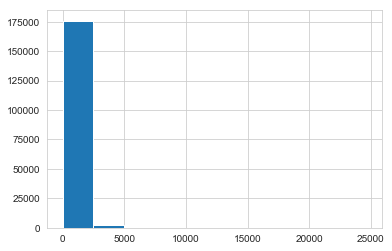

In [103]:
import matplotlib.pyplot as plt
dataset['JAN_09'].hist()
plt.show()

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


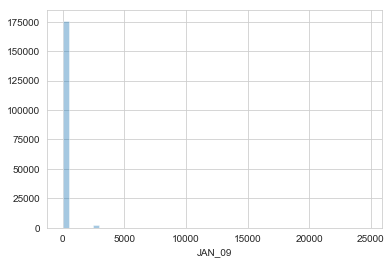

In [104]:
#The distribution of continous variables
sns.distplot(dataset['JAN_09'],kde = False)
plt.show()

In [105]:
#pd.plotting.scatter_matrix(dataset)

In [106]:
dataset

,USER_TYPE,CATEGORY,JAN_09,FEB_09,MARCH_09,APRIL_09,MAY_09,JUNE_09,JULY_09,AUGUST_09,...,MARCH_15,APRIL_15,MAY_15,JUNE_15,JULY_15,AUGUST_15,SEPT_15,OCT_15,NOV_15,DEC_15
0,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0
2,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,17.000000,...,19.0,19.0,18.0,18.0,19.0,19.0,19.0,18.0,18.0,24.0
3,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,24.0
4,H3,DOMESTIC,30.000000,10.000000,30.000000,20.000000,30.0000,30.000000,30.000000,30.000000,...,14.0,15.0,26.0,27.0,29.0,22.0,27.0,26.0,33.0,32.0
5,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,...,0.0,7.0,7.0,8.0,5.0,7.0,16.0,7.0,7.0,4.0
6,H3,DOMESTIC,19.000000,21.000000,21.000000,22.000000,26.0000,20.000000,23.000000,21.000000,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0
7,H3,DOMESTIC,9.000000,12.000000,13.000000,13.000000,22.0000,21.000000,19.000000,20.000000,...,14.0,25.0,17.0,36.0,34.0,39.0,52.0,33.0,27.0,27.0
8,H3,DOMESTIC,14.000000,14.000000,14.000000,14.000000,14.0000,14.000000,14.000000,14.000000,...,7.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,4.0,5.0
9,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


In [107]:
dataset.apply(lambda x: sum(x.isnull()),axis=0)

USER_TYPE    0
CATEGORY     0
JAN_09       0
FEB_09       0
MARCH_09     0
APRIL_09     0
MAY_09       0
JUNE_09      0
JULY_09      0
AUGUST_09    0
SEPT_09      0
OCT_09       0
NOV_09       0
DEC_09       0
JAN_10       0
FEB_10       0
MARCH_10     0
APRIL_10     0
MAY_10       0
JUNE_10      0
JULY_10      0
AUGUST_10    0
SEPT_10      0
OCT_10       0
NOV_10       0
DEC_10       0
JAN_11       0
FEB_11       0
MARCH_11     0
APRIL_11     0
            ..
JULY_13      0
AUGUST_13    0
SEPT_13      0
OCT_13       0
NOV_13       0
DEC_13       0
JAN_14       0
FEB_14       0
MARCH_14     0
APRIL_14     0
MAY_14       0
JUNE_14      0
JULY_14      0
AUGUST_14    0
SEPT_14      0
OCT_14       0
NOV_14       0
DEC_14       0
JAN_15       0
FEB_15       0
MARCH_15     0
APRIL_15     0
MAY_15       0
JUNE_15      0
JULY_15      0
AUGUST_15    0
SEPT_15      0
OCT_15       0
NOV_15       0
DEC_15       0
Length: 86, dtype: int64

In [108]:
dataset.columns


Index(['USER_TYPE', 'CATEGORY', 'JAN_09', 'FEB_09', 'MARCH_09', 'APRIL_09',
       'MAY_09', 'JUNE_09', 'JULY_09', 'AUGUST_09', 'SEPT_09', 'OCT_09',
       'NOV_09', 'DEC_09', 'JAN_10', 'FEB_10', 'MARCH_10', 'APRIL_10',
       'MAY_10', 'JUNE_10', 'JULY_10', 'AUGUST_10', 'SEPT_10', 'OCT_10',
       'NOV_10', 'DEC_10', 'JAN_11', 'FEB_11', 'MARCH_11', 'APRIL_11',
       'MAY_11', 'JUNE_11', 'JULY_11', 'AUGUST_11', 'SEPT_11', 'OCT_11',
       'NOV_11', 'DEC_11', 'JAN_12', 'FEB_12', 'MARCH_12', 'APRIL_12',
       'MAY_12', 'JUNE_12', 'JULY_12', 'AUGUST_12', 'SEPT_12', 'OCT_12',
       'NOV_12', 'DEC_12', 'JAN_13', 'FEB_13', 'MARCH_13', 'APRIL_13',
       'MAY_13', 'JUNE_13', 'JULY_13', 'AUGUST_13', 'SEPT_13', 'OCT_13',
       'NOV_13', 'DEC_13', 'JAN_14', 'FEB_14', 'MARCH_14', 'APRIL_14',
       'MAY_14', 'JUNE_14', 'JULY_14', 'AUGUST_14', 'SEPT_14', 'OCT_14',
       'NOV_14', 'DEC_14', 'JAN_15', 'FEB_15', 'MARCH_15', 'APRIL_15',
       'MAY_15', 'JUNE_15', 'JULY_15', 'AUGUST_15', 'SEPT_15

In [109]:
#Checking for the missing clumns
dataset.isnull().any()

USER_TYPE    False
CATEGORY     False
JAN_09       False
FEB_09       False
MARCH_09     False
APRIL_09     False
MAY_09       False
JUNE_09      False
JULY_09      False
AUGUST_09    False
SEPT_09      False
OCT_09       False
NOV_09       False
DEC_09       False
JAN_10       False
FEB_10       False
MARCH_10     False
APRIL_10     False
MAY_10       False
JUNE_10      False
JULY_10      False
AUGUST_10    False
SEPT_10      False
OCT_10       False
NOV_10       False
DEC_10       False
JAN_11       False
FEB_11       False
MARCH_11     False
APRIL_11     False
             ...  
JULY_13      False
AUGUST_13    False
SEPT_13      False
OCT_13       False
NOV_13       False
DEC_13       False
JAN_14       False
FEB_14       False
MARCH_14     False
APRIL_14     False
MAY_14       False
JUNE_14      False
JULY_14      False
AUGUST_14    False
SEPT_14      False
OCT_14       False
NOV_14       False
DEC_14       False
JAN_15       False
FEB_15       False
MARCH_15     False
APRIL_15    

In [110]:
dataset


,USER_TYPE,CATEGORY,JAN_09,FEB_09,MARCH_09,APRIL_09,MAY_09,JUNE_09,JULY_09,AUGUST_09,...,MARCH_15,APRIL_15,MAY_15,JUNE_15,JULY_15,AUGUST_15,SEPT_15,OCT_15,NOV_15,DEC_15
0,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0
2,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,17.000000,...,19.0,19.0,18.0,18.0,19.0,19.0,19.0,18.0,18.0,24.0
3,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,24.0
4,H3,DOMESTIC,30.000000,10.000000,30.000000,20.000000,30.0000,30.000000,30.000000,30.000000,...,14.0,15.0,26.0,27.0,29.0,22.0,27.0,26.0,33.0,32.0
5,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,...,0.0,7.0,7.0,8.0,5.0,7.0,16.0,7.0,7.0,4.0
6,H3,DOMESTIC,19.000000,21.000000,21.000000,22.000000,26.0000,20.000000,23.000000,21.000000,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0
7,H3,DOMESTIC,9.000000,12.000000,13.000000,13.000000,22.0000,21.000000,19.000000,20.000000,...,14.0,25.0,17.0,36.0,34.0,39.0,52.0,33.0,27.0,27.0
8,H3,DOMESTIC,14.000000,14.000000,14.000000,14.000000,14.0000,14.000000,14.000000,14.000000,...,7.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,4.0,5.0
9,H3,DOMESTIC,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


VISUALIZING THE DATA TO OBTAIN THE DATA VARIATIONS

In [111]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as snb


In [112]:
%matplotlib inline
rcParams['figure.figsize']=5,4
snb.set_style('whitegrid')

In [113]:
datas=pd.read_csv('waterproject.csv')

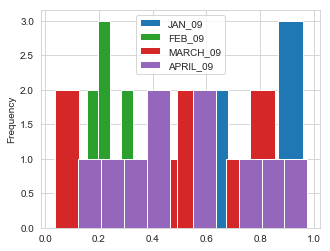

In [114]:
#datas.index=datas.USER_TYPE
#JAN_09=datas['JAN_09']
#JAN_09.plot(kind='hist')
y = np.random.rand(10,12)
y[:,0]= np.arange(10)
datas=pd.DataFrame(y, columns=['CATEGORY','JAN_09','FEB_09','MARCH_09','APRIL_09','MAY_09','JUNE_09','JULY_09','SEPT_09','OCT_09','NOV_09','DEC_09'])
ax = datas.plot( y="JAN_09", kind="hist")
datas.plot( y="FEB_09", kind="hist", ax=ax, color="C2")
datas.plot( y="MARCH_09", kind="hist", ax=ax, color="C3")
datas.plot( y="APRIL_09", kind="hist", ax=ax, color="C4")

plt.show()


In [115]:
#dataset

In [116]:
dataset['JAN_09']=round((dataset['JAN_09']))
#print(dataset['JAN_09'])

VISUALIZING THE DATA WITH SCATTER PLOTS

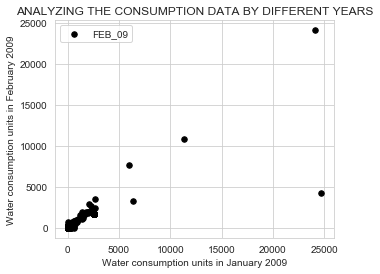

In [117]:
import matplotlib.pyplot as plt
x=dataset['JAN_09']
y=dataset['FEB_09']
plt.scatter(x,y,color='k',s=30)

plt.xlabel('Water consumption units in January 2009')
plt.ylabel('Water consumption units in February 2009')
plt.title('ANALYZING THE CONSUMPTION DATA BY DIFFERENT YEARS')
plt.legend()
plt.show()

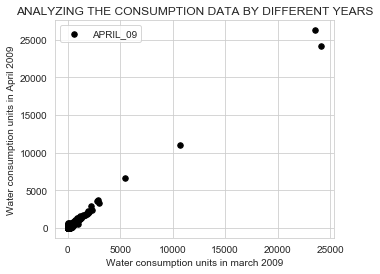

In [118]:
import matplotlib.pyplot as plt
x=dataset['MARCH_09']
y=dataset['APRIL_09']
plt.scatter(x,y,color='k',s=30)

plt.xlabel('Water consumption units in march 2009')
plt.ylabel('Water consumption units in April 2009')
plt.title('ANALYZING THE CONSUMPTION DATA BY DIFFERENT YEARS')
plt.legend()
plt.show()

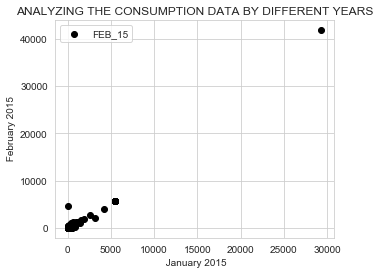

In [119]:
import matplotlib.pyplot as plt
x=dataset['JAN_15']
y=dataset['FEB_15']
plt.scatter(x,y,color='k')

plt.xlabel(' January 2015')
plt.ylabel(' February 2015')
plt.title('ANALYZING THE CONSUMPTION DATA BY DIFFERENT YEARS')
plt.legend()
plt.show()

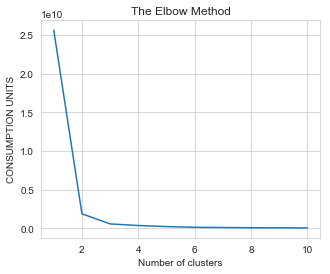

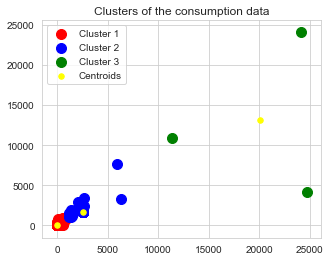

In [120]:
# K-Means Clustering

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the mall dataset with pandas

tks = pd.read_csv('consumption.csv')
X = tks.iloc[:,[3,4]].values

# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CONSUMPTION UNITS')
plt.show()

# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)

# Visualising the clusters

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 30, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of the consumption data')
plt.legend()
plt.show()

In [121]:
#dataset.head()

In [122]:
import pandas as data
dataset.to_csv('consumption.csv')
tf=data.read_csv('consumption.csv')
tf.head(4)

,Unnamed: 0,USER_TYPE,CATEGORY,JAN_09,FEB_09,MARCH_09,APRIL_09,MAY_09,JUNE_09,JULY_09,...,MARCH_15,APRIL_15,MAY_15,JUNE_15,JULY_15,AUGUST_15,SEPT_15,OCT_15,NOV_15,DEC_15
0,0,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,2.0,1.0,2.0,1.0,7.0,7.0,42.0,27.0,22.0,21.0
1,1,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,27.0,27.0,27.0,28.0,28.0,31.0,27.0,27.0,27.0,24.0
2,2,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,19.0,19.0,18.0,18.0,19.0,19.0,19.0,18.0,18.0,24.0
3,3,H3,DOMESTIC,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,24.0


In [123]:
#dataset.isnull().sum()

In [124]:
#ROUNDING OFF THE DATA 
dec=data.Series([0,0,0,0,
                 0,0,0,0,
                 0,0,0,0,
                 0,0,0,0,
                 0,0,0,0,
                 0,0,0,0],index=['FEB_09','MARCH_09','APRIL_09','MAY_09',
                                                                'JUNE_09','JULY_09','AUGUST_09','SEPT_09',
                                                                'OCT_09','NOV_09','DEC_09','JAN_10',
                                                                'FEB_10','MARCH_10','APRIL_10','MAY_10',
                                                                'JUNE_10','JULY_10','AUGUST_10','SEPT_10',
                                                                'OCT_10','NOV_10','DEC_10','JAN_11',])
#tf.round(dec)